# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import numpy as np

In [22]:
def plot_regression_predictions(tree_reg, X, y, ax, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    ax.set_xlabel('$x_1$')
    ax.plot(X, y, "b.")
    ax.plot(x1, y_pred, "r.-", linewidth=2, label="$\hat{y}$")

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
/var/folders/by/pqh4gvw52t5fm7pvbqnvcyy00000gn/T/ipykernel_86009/4206599206.py:6: SyntaxWarning: invalid escape sequence '\h'
  ax.plot(x1, y_pred, "r.-", linewidth=2, label="$\hat{y}$")


In [23]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

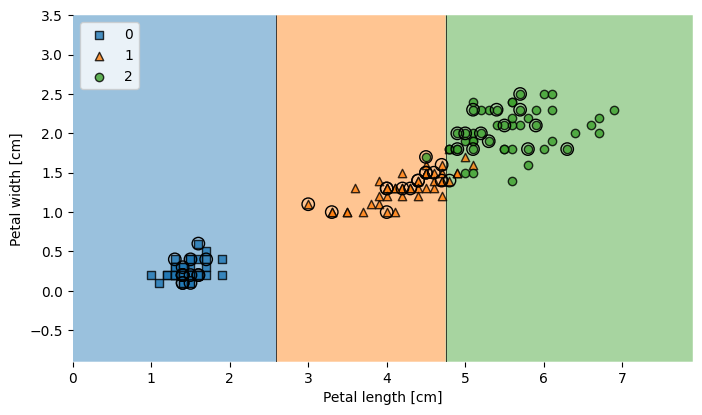

In [24]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=2 ,random_state=42)
tree_model.fit(X_train, y_train)
fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot()
plot_decision_regions(X, y,
                      clf=tree_model, ax=ax,
                      X_highlight=X_test)
ax.set_xlabel('Petal length [cm]')
ax.set_ylabel('Petal width [cm]')
ax.legend(loc='upper left')

[Text(0.4, 0.8333333333333334, 'Petal length <= 2.6\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = Setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Setosa'),
 Text(0.6, 0.5, 'Petal length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = Versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.219\nsamples = 40\nvalue = [0, 5, 35]\nclass = Virginica')]

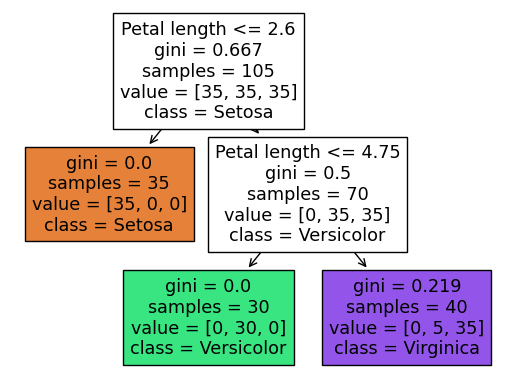

In [25]:
feature_names = ['Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               filled=True)

In [26]:
tree_model.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.125, 0.875]])

In [27]:
tree_model.predict([[5, 1.5]])

array([2])

In [28]:
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))

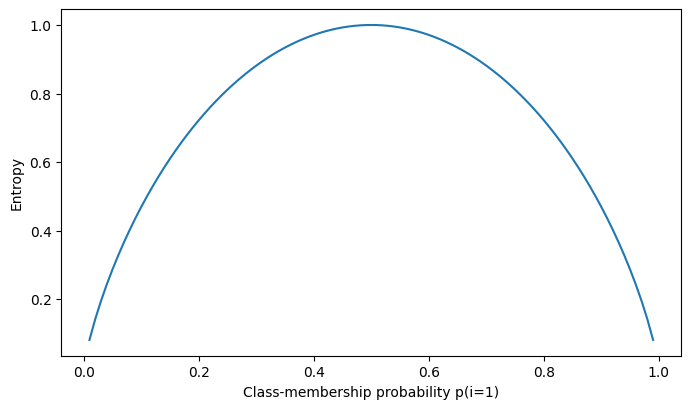

In [29]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot()
ax.set_ylabel('Entropy')
ax.set_xlabel('Class-membership probability p(i=1)')
ax.plot(x, ent)

In [30]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

Text(0, 0.5, 'Impurity index')

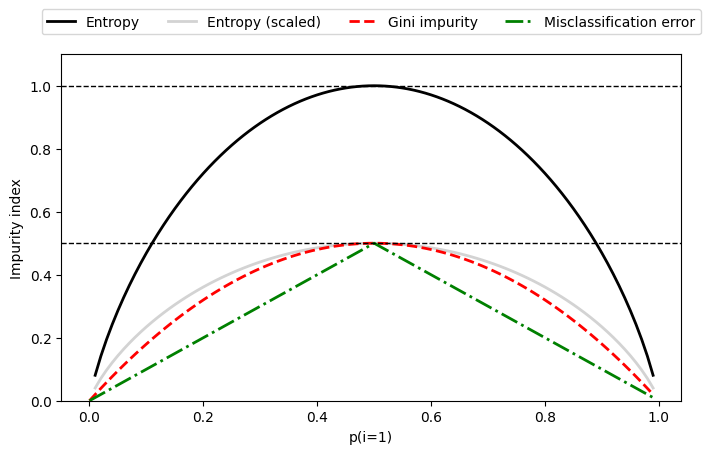

In [31]:
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot()
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)',
                          'Gini impurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
ax.set_ylim([0, 1.1])
ax.set_xlabel('p(i=1)')
ax.set_ylabel('Impurity index')

In [41]:
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

In [46]:
angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix) # application of the trasnformation

In [47]:
tree_clf_square = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_clf_square.fit(X_square, y_square)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [50]:
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

DecisionTreeClassifier(max_depth=4, random_state=42)

<Axes: >

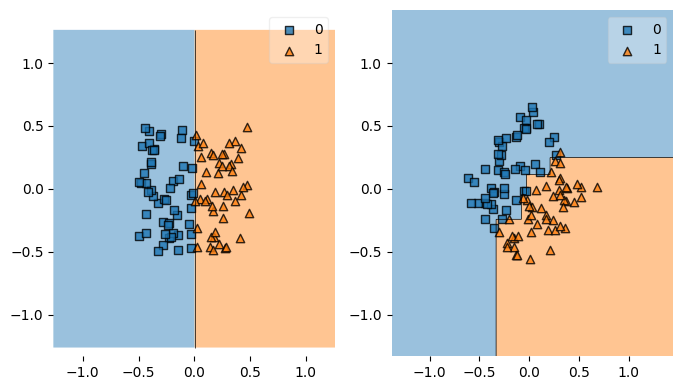

In [51]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4.5), sharey=True)
plot_decision_regions(X_square, y_square, clf=tree_clf_square, zoom_factor=1.3, ax=axes[0])
plot_decision_regions(X_rotated_square, y_square, clf=tree_clf_rotated_square, zoom_factor=1.3, ax=axes[1])

PCA may help to find a better orientation of the dataset to support the identification of more robust decision regions.

In [52]:
pipe_clf = Pipeline([
    ('scaler', StandardScaler()),
     ('dim_sclaer', PCA())
])

X_rotated = pipe_clf.fit_transform(X)
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X_rotated, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Text(0, 0.5, 'Component 2')

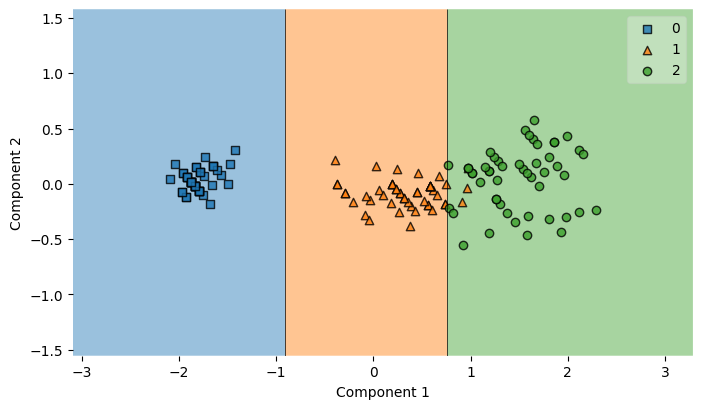

In [53]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot()
plot_decision_regions(X_rotated, y, clf=tree_clf, ax=ax)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

[Text(0.4, 0.8333333333333334, 'Comp1 <= -0.911\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(0.6, 0.5, 'Comp1 <= 0.758\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.107\nsamples = 53\nvalue = [0, 3, 50]\nclass = Virginica')]

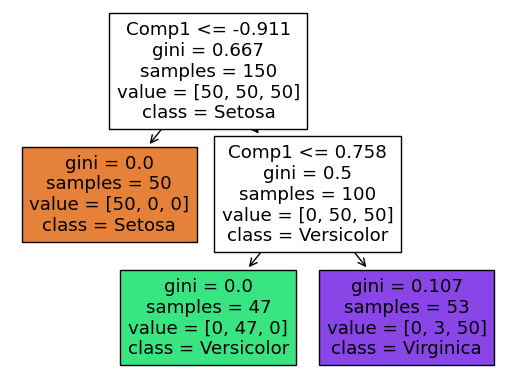

In [54]:
tree.plot_tree(tree_clf, 
               feature_names=['Comp1', 'Comp 2'],
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               filled=True)

In [55]:
# generation of the dataset
X_quad = np.random.rand(200, 1) - 0.5 # a single random iput feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'X 1 <= 0.353\nsquared_error = 0.005\nsamples = 200\nvalue = 0.09'),
 Text(0.25, 0.5, 'X 1 <= -0.374\nsquared_error = 0.004\nsamples = 167\nvalue = 0.073'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.002\nsamples = 28\nvalue = 0.184'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.002\nsamples = 139\nvalue = 0.05'),
 Text(0.75, 0.5, 'X 1 <= 0.422\nsquared_error = 0.001\nsamples = 33\nvalue = 0.177'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.001\nsamples = 16\nvalue = 0.15'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.001\nsamples = 17\nvalue = 0.201')]

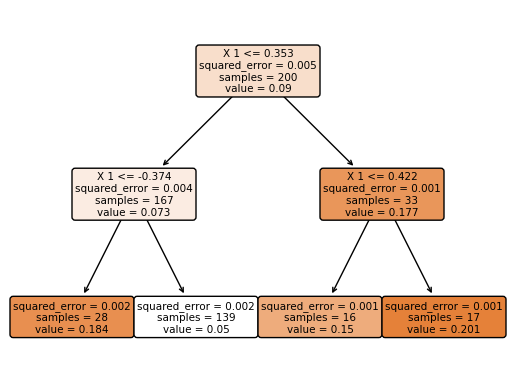

In [56]:
tree.plot_tree(tree_reg, feature_names=['X 1'],
               filled=True, rounded=True)

Text(0.5, 1.0, 'max_depth=3')

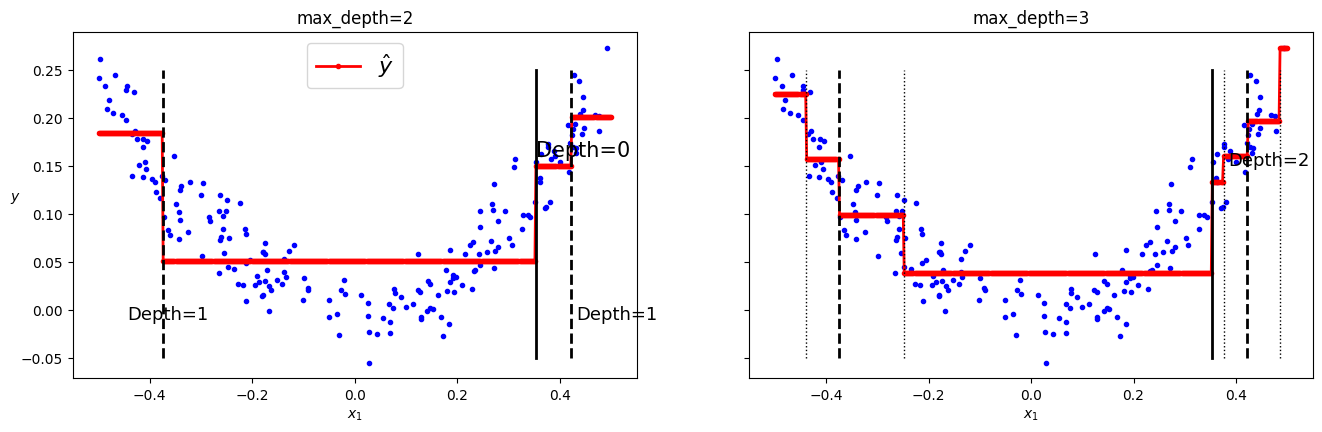

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4.5), sharey=True)
plot_regression_predictions(tree_reg, X_quad, y_quad, ax=axes[0])

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    axes[0].plot([split, split], [-0.05, 0.25], style, linewidth=2)
axes[0].text(th0, 0.16, "Depth=0", fontsize=15)
axes[0].text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
axes[0].text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
axes[0].set_ylabel("$y$", rotation=0)
axes[0].legend(loc="upper center", fontsize=16)
axes[0].set_title("max_depth=2")

tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad,ax = axes[1] )
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    axes[1].plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    axes[1].plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
axes[1].text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
axes[1].set_title("max_depth=3")

Text(0.5, 1.0, 'min_samples_leaf=10')

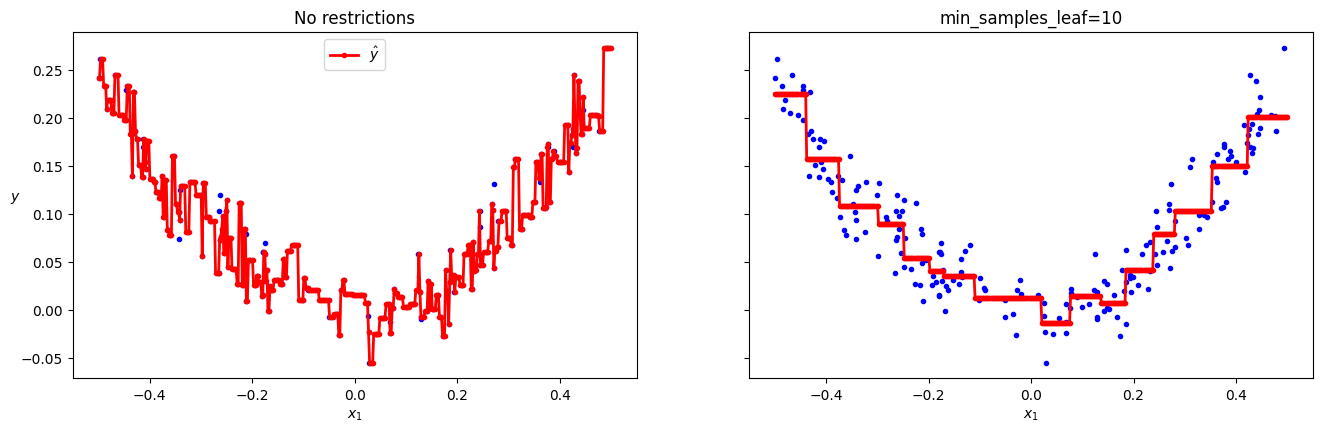

In [58]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(16, 4.5), sharey=True)
ax = axes[0]
ax.plot(X_quad, y_quad, "b.")
ax.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$", rotation=0)
ax.legend(loc="upper center")
ax.set_title("No restrictions")

ax = axes[1]
ax.plot(X_quad, y_quad, "b.")
ax.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
ax.set_xlabel("$x_1$")
ax.set_title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")